<a href="https://colab.research.google.com/github/smo216/Machine-Learning-Project/blob/master/Orzolek_Machine_Learning_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Image Classification for Microstructural Characterization**
Sean Orzolek

# **Abstract**


Microstructural characterization through image analysis allows researchers to make quantitative comparisons between samples and is less subjective than typical qualitative comparisons. A common approach is to use image segmentation with programs such as Image-J and MATLAB to extract and quantify features of interest. This is especially useful for multicomponent alloys such as 25Cr-35Ni-1Nb high temperature stainless steels which exhibits an austenite matrix with both niobium and chromium carbides. The present study evaluates a systematic compositional matrix of 12 alloys with variations of tungsten, titanium, carbon, silicon and niobium. Backscatter electron images are used to train a series of unsupervised machine learning methods in order to classify the microstructure. Utilizing transfer learning on pretrained ResNet34, 50 and 101 neural networks a classification accuracy of a 84% was achieved. Although this level of accuracy is typically undesirable for machine learning applications, the present work shows that the misclassified images can be insightful for microstructural comparisons. Recommendations are made for future applications where machine learning techniques can provide material scientists with quantitative comparisons of the microstructure and properties.

# **Introduction**

Microstructural image analysis is a common technique utilized by material scientists to provide quantitative and qualitative observations of different materials. Images are typically collected either by light optical microscopy(LOM) or scanning electron microscopy(SEM) to reveal critical information such as phase type, amount and morphology. These criteria can be quantified through the use of quantitative image analysis (QIA) where the images are processed by a computer program (Image J, MATLAB, Python, etc.) where each image is segmented into binary images, corresponding to each phase. This can be especially useful when coupled with backscatter electron images where the contrast of each phase is correlated to the atomic number density with high atomic number phases appearing bright, and low atomic number phases appearing as dark.[1] Microstructural features such as the amount of total phase can be quantified using QIA but there are many features that are more difficult to quantify such as carbide morphology and continuity, among others. Additionally, researchers commonly collect a multitude of images for each material but it can be difficult and time consuming to compare images at such a scale. For this task, unsupervised machine learning classifiers provide a potential solution for identifying both similarity and dissimilarity between images, to assist in material characterization.

Previous studies have utilized machine learning techniques for conventional material science characterization. Tsopanidis et. al. utilized UNET for automated segmentation of intergranular and transgranular fracture surfaces of Al2O3 and MgAl2O4 ceramic materials with an accuracy of up to 91% in the refined model.[2] More recently, researchers have utilized machine learning techniques for developing synthetic microstructures and super-resolution images, both of which are useful for expanding the knowledge and capabilities of material scientists.[3], [4] However, the field of metallurgy has seen limited applications for these advanced models but recent studies have shown the potential of deep learning for classifying and segmenting the microstructure for phase identification.[5]–[7] Although this approach has only been utilized for low alloy, ferritic steels it is of interest to apply such techniques to high alloy austenitic stainless steels. 

In the present study, backscatter electron images of twelve 25Cr-35Ni-1Nb alloys were evaluated with compositions listed in Table I. The alloy matrix was designed to have systematic changes in composition which are highlighted in bold resulting in a variety of microstructures and mechanical properties. For example, Alloys 5 and 6 have all elements held constant with the exception of carbon and alloys 10-18 have systematic variations in niobium, tungsten and titanium. 

**Table I. Alloy composition matrix with compositions listed in wt%.**

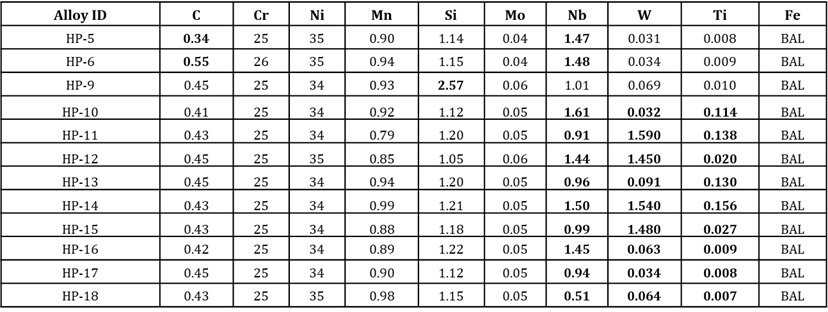

The majority of the alloys characterized exhibit microstructures similar to those shown in Figure 1 with an austenite matrix populated with M7C3 and MC carbides. The MC carbides are niobium/titanium rich and the M7C3 carbides are iron/chromium rich.[8]–[10] However, the amount, size, morphology and distribution of these phases are highly variable from alloy to alloy and are difficult to interpret. Therefore, in order to improve the understanding of these materials, machine learning can be utilized to help quantify and identify the similarities between the microstructures. The objective of this study is to utilize machine learning methods for image classifying the microstructures of the alloys listed in Table I. 

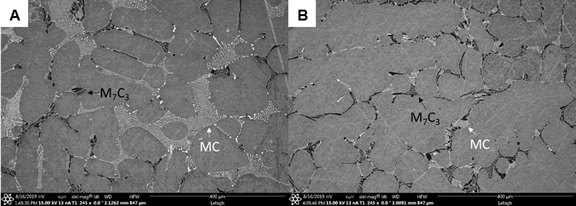


Figure 1. Backscatter electron images of representative microstructures for two alloys evaluated in this study: A-HP-6, B:HP-18.


# Results

Backscatter election images were collected for each alloy with an image resolution of 4096x6140 pixels, which were then sliced into 1504 128x128 images per alloy in order to reduce the dimensionality while maintaining the image resolution. Work by Wanger et al, supported that reducing the input image size can result in both an increased accuracy and reduced training time.[11]  Prior to slicing, the images were converted from 16-bit to 8-bit and were standardized by subtracting by the mean and dividing by the standard deviation of the original image. The data was stored in the standard MNIST format with labeled folders according to each alloy identification number as listed in Table I. 

Initial characterization was conducted using linear machine learning methods for dimensionality reduction such as principal component analysis (PCA), non-negative matrix factorization (NMF) and uniform manifold approximation and projection (UMAP).[12] The results of each method were then visualized via K-means clustering as shown in Figure 2A-D fitting to 12 clusters according to the number of alloys evaluated. 


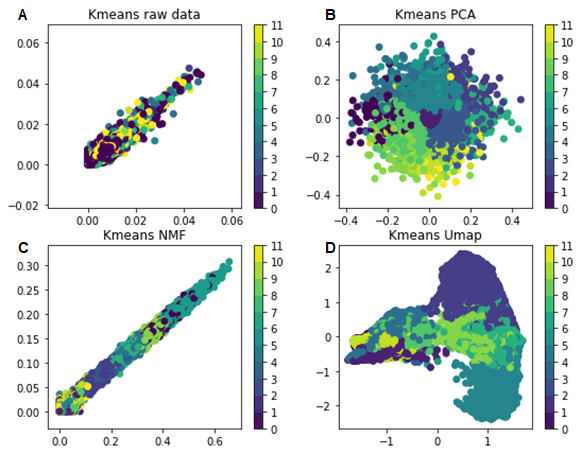

Figure 2. K-means clustering of dimensionality reduced data for A-raw data, B-PCA, C-NMF and D-Umap

Although UMAP provided the best grouping of the data, the high dimensionality of the data suggested that classification would be improved through the use of deep learning techniques. For this, ResNet34, 50 and 101 models were trained on the full dataset utilizing the alloy identification numbers as the labels for each image.[13] Initial learning rates were determined according to the use of the learning rate modules from FastAI and each model was trained to a total of 15 epochs. The accuracy at the 15th epoch was improved from 78% for ResNet 34 to 83.7% for ResNet50 and 84.2% for ResNet101. All 3 models displayed similar results so that the confusion matrix in Figure 3 for ResNet101 is representative of all of the models. The confusion matrix plots the predicted labels as a function of the actual labels and the number in each square is the number of images classified according to the x and y coordinate. By this metric, a perfectly trained model will have all of the classified images along the diagonal with no misclassified images on either side. However, in terms of image classification, a higher confusion between labeled datasets suggests that there is a similarity in the images. 

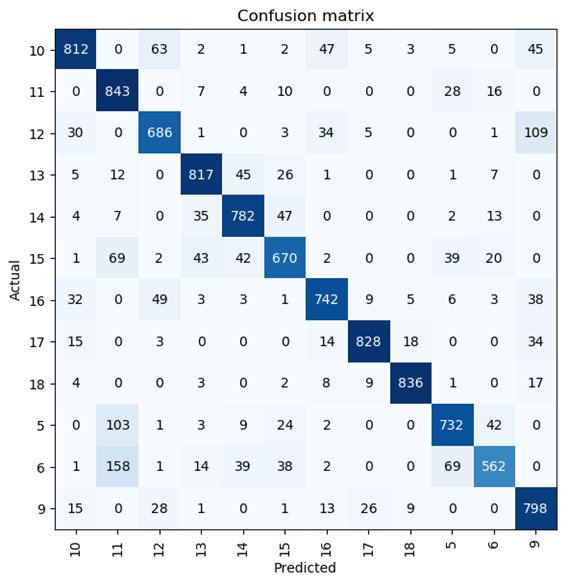

Figure 3. Confusion matrix for the ResNet101 model 

For example, the ResNet models predict a high rate of similarity between the microstructures of alloy 6 and alloy 11 as shown in Figure 4A-B.

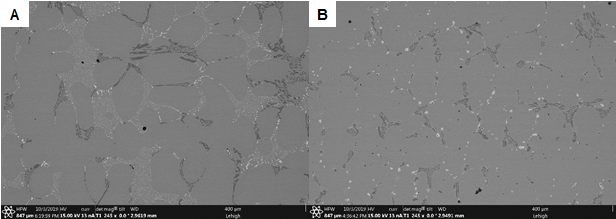

Figure 4. Backscatter electron micrographs of A-alloy 6 and B-alloy 11 which are the most similar according to Figure 3.

On the other hand, the ResNet models predict a high level of dissimilarity between alloys 18 and 12 as shown in Figure 5A-B.

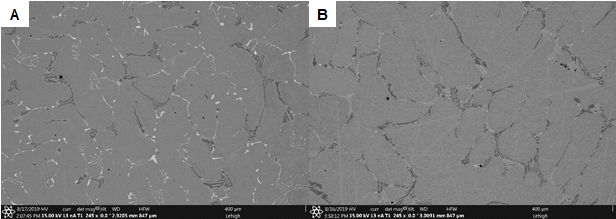

Figure 5. Backscatter electron micrographs of A-alloy 12 and B-alloy 18 which are the most dissimilar according to Figure 3.

The results presented have shown that feature extraction and image classification requires a robust dataset that has been properly labeled and preprocessed. However, the high accuracy for classification indicates that machine learning methods can be effective tools for material scientists to direct their attention to the best fitting (Figure 4) and the worst fitting (Figure 5) microstructures for further comparison. 

# Discussion

The results show the benefits and limitations of utilizing machine learning techniques for microstructural characterization. From the k-means clustering plots in Figure 2, the dimensionality reduction methods of the images improve the clustering of the data, but the dataset is highly continuous, making feature extraction difficult. Of the three dimensionality reduction methods utilized for this work (PCA, NMF, and UMAP), the best results were observed for the UMAP technique, likely due to the fact that UMAP is a non-linear graph-based algorithm which is better for high dimensional data.

Due to the inconclusive results of the dimensionality reduction techniques, transfer learning was conducted on pretrained neural networks of the Resnet 34, 50 and 101 architecture where the number corresponds to the number of layers in the network. Each network was trained using labels corresponding to the alloy ID associated with each image with the motivation to treat the model as a classifier. The confusion matrix in Figure 3 shows that the models are generally able to classify the alloy ID accurately but what is more insightful is where the classifier mislabeled an image as this indicates that the model is identifying similar features. For example, the highest misclassified combination is between alloy HP-6 and HP-11 indicating that the model is predicting that these alloys have similar microstructures. These microstructures are plotted for comparison in Figure 4 for Alloy 6 and Alloy 11 respectively.  This was an unexpected result as the microstructures appear to be dissimilar especially in terms of the morphology of the MC carbide however the model may instead be identifying features such as brightness, orientation, etc. which may not have a physical meaning. Additional research is required in order to determine what features are being extracted by the ResNet models and due to time restraints, no modification to the network architecture was made. Both of these statements support the claim that with more time, the model may be able to be refined further to provide meaningful data for material scientists.

Additionally, the model predicts no misclassification between alloys HP-6 and HP-17 with microstructures shown for comparison in Figure 5, indicating that these images are very dissimilar. This is again a surprising result as the morphology of the M7C3 and MC carbides appear somewhat similar but one major difference is the extent of continuity between the two microstructures. Alloy 12 exhibits discrete regions of MC carbide and M7C3 carbides where alloy 18 appears to have more of a “coupled morphology”, where the two carbides appear more connected. This may be a result of differences in the solidification conditions between the alloys and requires further analysis.  


# Conclusion


Image classification and microstructural characterization is a challenge for material scientists especially when multiple samples and regions are characterized. Machine learning has been shown to provide insight into these results by classifying and identifying similar and dissimilar images and associated microstructures. The results of this study show the potential for machine learning techniques applied to metallurgical microstructural analysis. Through the use of a pretrained ResNet 101 network, the alloy ID was classified to an 84% accuracy and the implications of this require further investigation.

# Disclosure Statement

The present work is funded by the Defense Logistics Agency(DLA) through the American Metalcasting Consortium and the Steel Founders society. As such, the data presented in this work is either proprietary or ITAR restricted data and can only be shared upon preapproval from the DLA. However, the pretrained models and code utilized in this work is available via the following link: https://github.com/smo216/Machine-Learning-Project.

# Citations

[1]	J. I. Goldstein, D. E. Newbury, P. Echlin, D. C. Joy, C. Fiori, and E. Lifshin, Scanning Electron Microscopy and X-Ray Microanalysis. 2011.

[2]	S. Tsopanidis, R. H. Moreno, and S. Osovski, “Toward quantitative fractography using convolutional neural networks,” arXiv Prepr. arXiv1908.02242, 2019.

[3]	J. Guo, S. Ma, and S. Guo, “MAANet: Multi-view Aware Attention Networks for Image Super-Resolution,” 2019.

[4]	R. Singh, V. Shah, B. Pokuri, S. Sarkar, B. Ganapathysubramanian, and C. Hegde, “Physics-aware Deep Generative Models for Creating Synthetic Microstructures,” vol. 1149365, pp. 1–10, 2018.

[5]	B. L. DeCost, B. Lei, T. Francis, and E. A. Holm, “High throughput quantitative metallography for complex microstructures using deep learning: A case study in ultrahigh carbon steel,” Microsc. Microanal., vol. 25, no. 1, pp. 21–29, 2019.

[6]	T. Johnson, D. Ph, S. Roy, D. Ph, T. Ebert, and D. Ph, “IMPLEMENTING MACHINE LEARNING ALGORITHMS FOR IDENTIFYING MICROSTRUCTURE OF MATERIALS A THESIS Presented to the Department of Computer Engineering and Computer Science California State University , Long Beach In Partial Fulfillment of the Requirements for ,” no. August, 2018.

[7]	J. Jang et al., “Residual neural network-based fully convolutional network for microstructure segmentation,” Sci. Technol. Weld. Join., vol. 0, no. 0, pp. 1–8, 2019.

[8]	K. Wieczerzak et al., “The effect of temperature on the evolution of eutectic carbides and M7C3 → M23C6carbides reaction in the rapidly solidified Fe-Cr-C alloy,” J. Alloys Compd., vol. 698, pp. 673–684, 2017.

[9]	K. G. Buchanan and M. V. Kral, “Crystallography and Morphology of Niobium Carbide in As-Cast HP-Niobium Reformer Tubes,” Metall. Mater. Trans. A, vol. 43, no. 6, pp. 1760–1769, Jun. 2012.

[10]	J. Laigo, F. Christien, R. Le Gall, F. Tancret, and J. Furtado, “SEM, EDS, EPMA-WDS and EBSD characterization of carbides in HP type heat resistant alloys,” Mater. Charact., vol. 59, no. 11, pp. 1580–1586, 2008.

[11]	T. C. Wanger and P. Frohn, “Testing the Efficient Network TRaining (ENTR) Hypothesis: initially reducing training image size makes Convolutional Neural Network training for image recognition tasks more efficient,” pp. 1–12, 2018.

[12]	G. Varoquaux, L. Buitinck, G. Louppe, O. Grisel, F. Pedregosa, and A. Mueller, “Scikit-learn,” GetMobile Mob. Comput. Commun., vol. 19, no. 1, pp. 29–33, 2015.

[13]	K. He, “Deep Residual Learning for Image Recognition.”



# **Code**

## Image Slicing/Preprocessing

Preprocessing of Images
Slices images from 4096x6140 pixel images into 1504 128x128 pixel images and standardizes them.

In [0]:
## For Image portion

#from google.colab import drive
#drive.mount('/content/gdrive')
from sklearn.preprocessing import StandardScaler
from PIL import ImageOps
from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from skimage.io import imread_collection
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram
import skimage
import pandas as pd
from pandas import read_csv
from skimage.transform import rescale, resize, downscale_local_mean
import h5py

slicepath=r"C:\Users\Orzolek\Pictures\HP Image Processing\Processed Images\Machine Learning\Slices"
os.chdir(slicepath)
slicecol=Image.open('HP-18_2.tif')#grab all files with .tif format
print(slicecol)
sliceima=np.array(slicecol)
h=4096
w=6140
sliceim=sliceima[0:h,0:w]
shape_hold = sliceim.shape
slicehold = np.copy(sliceim)
mean = np.mean(slicehold.reshape(-1))
std = np.std(slicehold)
sliceim = sliceim - mean
sliceim = sliceim / std
print(sliceim.shape)

imnpdat=[]#blank np array
img = sliceim
gridx=128
gridy=128
rangex=int(w/gridx)
rangey=int(h/gridy)

for x in range(rangex):
    for y in range(rangey):
        slice_bit=img[y*gridy:y*gridy+gridy,x*gridx:x*gridx+gridx]
        imnpdat.append(slice_bit)
        io.imsave(('18/HP-18_2_'+str(x)+'_'+str(y)+'.png'),slice_bit)
print(gridx)

## Dimensionality Reduction Techniques

Project is unsupervised learning for feature dectection and simularities between images.

Initial Attempts at image processing involve using PCA, NMF and UMAP

Currently the images are fed in as standardized 8 bit 128x128 images for all alloys

18048 images are analyzed

Data is labeled according to a path name : HP-5_3_0_0.png = HP-categories_z_x_y.png


In [0]:
#load multiple data
"""Utilize histogram matching to normalize images? https://scikit-image.org/docs/stable/auto_examples/transform/plot_histogram_matching.html#sphx-glr-auto-examples-transform-plot-histogram-matching-py"""
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import os

from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram
import skimage
import pandas as pd
from pandas import read_csv
import h5py
from skimage import io
import sklearn
from skimage.io import imread_collection
from sklearn import datasets
from pprint import pprint 


"""Read all sliced data files from the specified datapath and convert to an array"""

data_path=r"C:\Users\Orzolek\Python\Machine_Learning_Image_Processing\lineardata"
os.chdir(data_path)
traindata = imread_collection('*.png')
data=array(traindata[:])

categories = [] #labels: HP-1 etc
z=[] #image number used for each alloy
x=[] #sliced x coordinate
y=[] #sliced y coordinate

for img_filename in os.listdir(data_path):
    if img_filename.endswith(".png"):
        category, z1, x1, y1 = img_filename.split('.')[0].split('_')
        categories.append(int(category.strip("HP-")))#category)
        z.append(int(z1))
        x.append(int(x1))
        y.append(int(y1))

In [0]:
#sanity check
print(data.shape)
print(categories)
#print(x)

(51136, 128, 128)
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [0]:
#defining several variables for later use in the different machine learning models

n_samples = data.shape[0]
h, w = data[0].shape

n_features = h*w

#X will remain the main data variable for the different models
#if it is modified the previous version is usual saved to some other variable
Xog = data
d2_dX = data.reshape((n_samples,h*w))
X=data.reshape((n_samples,h*w))

d2_dX=sklearn.preprocessing.normalize(d2_dX)
X=d2_dX

### PCA

Text(0, 0.5, 'cumulative variance')

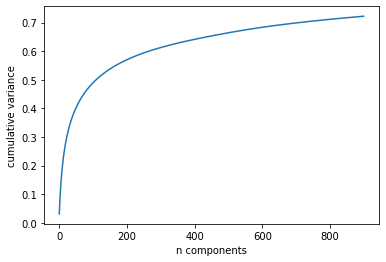

In [0]:
import numpy as np
from sklearn.decomposition import PCA

comp=900#n_features
n_components=comp
dX =d2_dX
pca = PCA(n_components=comp)
pca.fit(dX)
PCA(copy=True, iterated_power='auto', n_components=comp , random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  
X_pca = pca.transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

Appears to converge at ~200 components

Visualize first components

Projecting the input data on the eigenstructures orthonormal basis


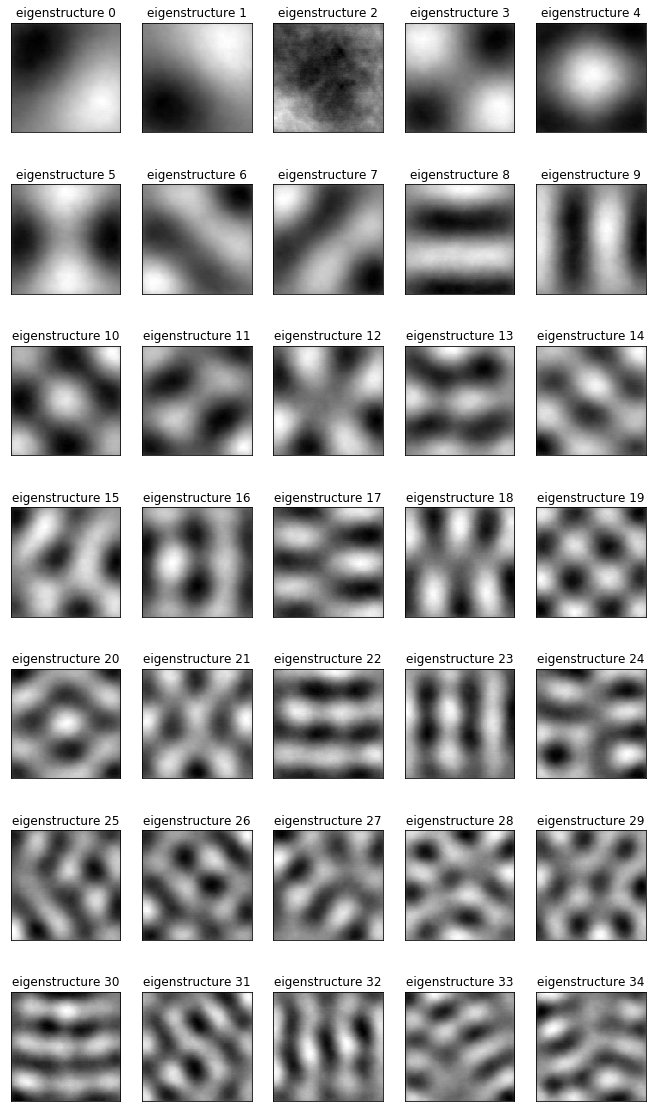

In [0]:
eigenfaces = pca.components_.reshape((comp, h,w))
print("Projecting the input data on the eigenstructures orthonormal basis")



def plot_gallery(images, titles, h, w, n_row=7, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenstructure %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


PCA appears to be identifying some patterns

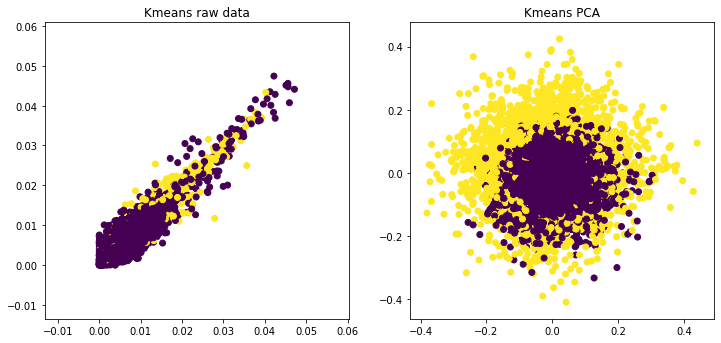

In [0]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause
#takes a while

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

random_state = 170
#X=dX
X =d2_dX
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Kmeans raw data")

X_pca = pca.transform(X)
#t0 = time()
k2_pca_pred = KMeans(n_clusters=2).fit_predict(X_pca)

# Incorrect number of clusters
#y_pred = KMeans(n_clusters=10, random_state=random_state).fit_predict(X)

plt.subplot(222)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k2_pca_pred)
plt.title("Kmeans PCA")

plt.show()

Initial grouping is poor but PCA helps organize the data

### NMF


In [0]:
from sklearn.decomposition import NMF
nmfmodel = NMF(n_components=200, init='random', random_state=0, l1_ratio=1)
nmfmodelpca = NMF(n_components=200, init='random', random_state=0)

In [0]:
X_nmf = nmfmodel.fit_transform(X)
#X_nmf_pca = nmfmodelpca.fit_transform(X_pca)
H = nmfmodel.components_

Projecting the input data on the eigenstructures orthonormal basis


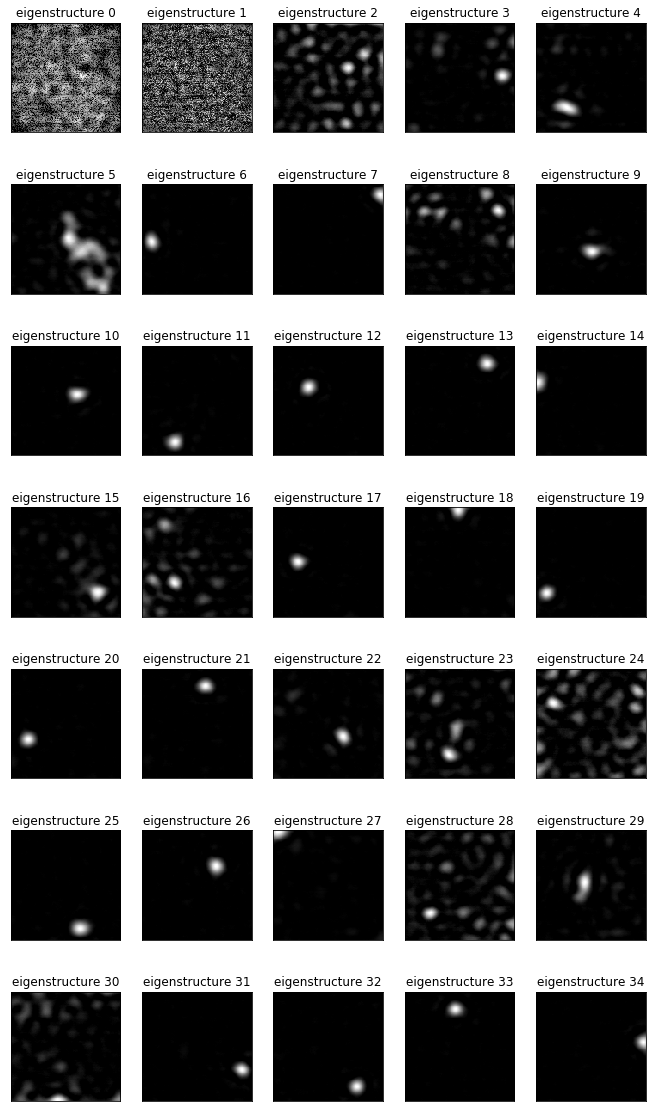

In [0]:
eigenface2 = nmfmodel.components_.reshape((200, h,w))
print("Projecting the input data on the eigenstructures orthonormal basis")



def plot_gallery(images, titles, h, w, n_row=7, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenstructure %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenface2, eigenface_titles, h, w)

plt.show()


Seems to work worse than PCA

### UMAP

In [0]:
#Umap
#!pip install umap-learn
import umap
reducer = umap.UMAP(random_state=42,n_components=200)
reducerpca = umap.UMAP(random_state=42,n_components=200)
reducer.fit(X)
reducerpca.fit(X_pca)


C:\Users\Orzolek\AppData\Local\Continuum\anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
C:\Users\Orzolek\AppData\Local\Continuum\anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\AppData

In [0]:
X_umap = reducer.transform(X)
X_umap_pca=reducerpca.transform(X_pca)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(X_umap == reducer.embedding_))
assert(np.all(X_umap_pca == reducerpca.embedding_))
X_umap.shape
X_umap_pca.shape

(51136, 200)

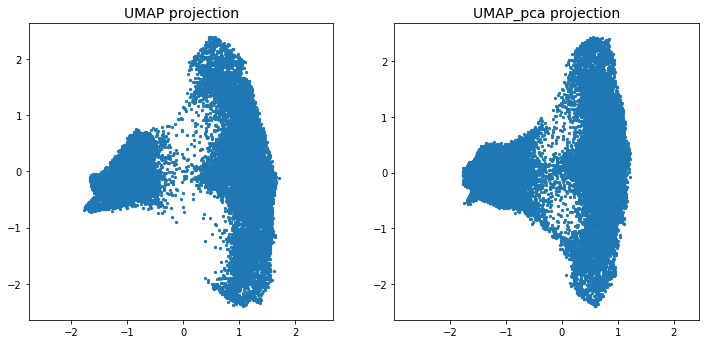

In [0]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection', fontsize=14);

plt.subplot(222)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP_pca projection', fontsize=14);


Seems to be working the best

K means Clustering of the 3 models and the original dataset

In [0]:
#Kmeans of 3 models

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

clust=12
random_state = 170
X=dX
y_pred = KMeans(n_clusters=clust, random_state=random_state).fit_predict(X)
k2_pca_pred = KMeans(n_clusters=clust).fit_predict(X_pca)
k2_nmf_pred = KMeans(n_clusters=clust).fit_predict(X_nmf)
k2_umap_pred = KMeans(n_clusters=clust).fit_predict(X_umap)

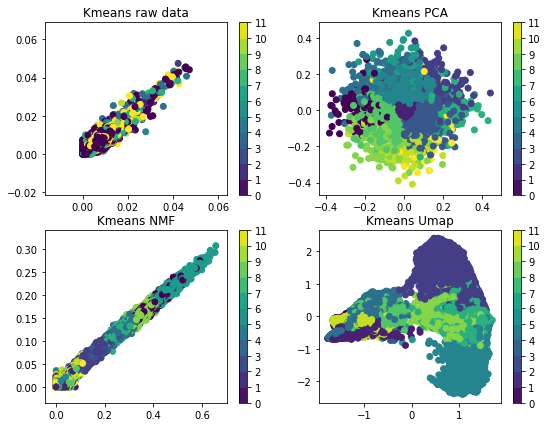

In [0]:
#Kmeans of 3 models
plt.figure(figsize=(9, 7))
# Incorrect number of clusters
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
matplotlib.pyplot.viridis()
plt.colorbar(boundaries=np.arange(clust)).set_ticks(np.arange(clust))
plt.title("Kmeans raw data")

plt.subplot(222)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k2_pca_pred)
plt.colorbar(boundaries=np.arange(clust)).set_ticks(np.arange(clust))
plt.title("Kmeans PCA")

plt.subplot(223)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=k2_nmf_pred)
plt.colorbar(boundaries=np.arange(clust)).set_ticks(np.arange(clust))
plt.title("Kmeans NMF")

#k2_nmf_pca_pred = KMeans(n_clusters=clust).fit_predict(X_nmf_pca)

#plt.subplot(234)
#plt.scatter(X_nmf_pca[:, 0], X_nmf_pca[:, 1], c=k2_nmf_pca_pred)
#plt.title("Kmeans NMF pca")

plt.subplot(224)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=k2_umap_pred)
plt.title("Kmeans Umap")

"""k2_umap_pca_pred = KMeans(n_clusters=clust).fit_predict(X_umap_pca)

plt.subplot(236)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=k2_umap_pca_pred)
plt.title("Kmeans Umap pca")"""
plt.colorbar(boundaries=np.arange(clust)).set_ticks(np.arange(clust))

plt.show()

UMAP appears to perform the best but is still highly continuous

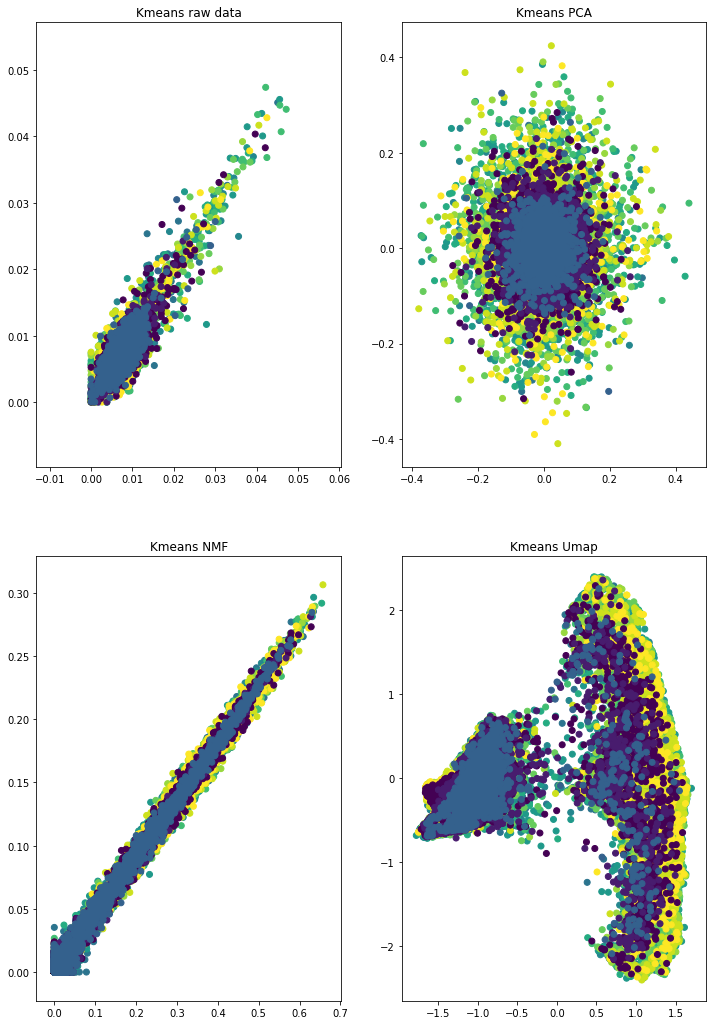

In [0]:
#Plotted model components with labels as colorscale

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

plt.figure(figsize=(12, 18))

X=dX
#X=data.reshape((n_samples,h*w))

# Incorrect number of clusters
#y_pred = KMeans(n_clusters=clust, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=categories)
plt.title("Kmeans raw data")

#k2_pca_pred = KMeans(n_clusters=clust).fit_predict(X_pca)

plt.subplot(222)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=categories)
plt.title("Kmeans PCA")

#k2_nmf_pred = KMeans(n_clusters=clust).fit_predict(X_nmf)

plt.subplot(223)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=categories)
plt.title("Kmeans NMF")

#k2_nmf_pca_pred = KMeans(n_clusters=clust).fit_predict(X_nmf_pca)

#plt.subplot(234)
#plt.scatter(X_nmf_pca[:, 0], X_nmf_pca[:, 1], c=k2_nmf_pca_pred)
#plt.title("Kmeans NMF pca")


#k2_umap_pred = KMeans(n_clusters=clust).fit_predict(X_umap)

plt.subplot(224)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=categories)
plt.title("Kmeans Umap")
#plt.colorbar(boundaries=np.arange(categories)).set_ticks(np.arange(categories))
"""k2_umap_pca_pred = KMeans(n_clusters=clust).fit_predict(X_umap_pca)

plt.subplot(236)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=k2_umap_pca_pred)
plt.title("Kmeans Umap pca")"""

plt.show()

## Neural Network Techniques

In [0]:
from fastai.vision import *
import os
from fastai.gen_doc.nbdoc import *
from fastai.basics import *
np.random.seed(42)
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import fastai
from nbdev.showdoc import *
import pandas as pd
import torch
#from torch import IntToFloatTensor
import numpy as np

path=r"/home/seanorzolek/Documents/Machine Learning/data"

In [0]:
#!/usr/bin/env python
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

{'total': 67207303168,
 'available': 60627619840,
 'percent': 9.8,
 'used': 5199478784,
 'free': 56197132288,
 'active': 7567171584,
 'inactive': 2199363584,
 'buffers': 1021857792,
 'cached': 4788834304,
 'shared': 630792192,
 'slab': 723423232}

In [0]:
!nvidia-smi

Tue Dec 10 14:39:29 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 440.36       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 77%   69C    P0   100W / 250W |     12MiB / 11019MiB |     11%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:68:00.0  On |                  N/A |
| 32%   46C    P8    31W / 250W |    635MiB / 11018MiB |     16%      Default |
+-------------------------------+----------------------+----------------------+
        

In [0]:
tfms = get_transforms()  # Default fastai data augmentation options
size = 124  # Will result in 28x28 square images; passing in (224, 448) will result in 224x448 images
bs = 124  # Batch size
data = (ImageList.from_folder(path)  # convert_mode is passed on internally to the relevant function that will handle converting the images; 'L' results in one color channel
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms, size=size)
        .databunch(bs=bs).normalize())

In [0]:
data.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (43316 items)
x: ImageList
Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124)
y: CategoryList
17,17,17,17,17
Path: /home/seanorzolek/Documents/Machine Learning/data;

Valid: LabelList (10828 items)
x: ImageList
Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124)
y: CategoryList
11,16,12,15,5
Path: /home/seanorzolek/Documents/Machine Learning/data;

Test: None>

In [0]:
src_size = data.batch_size

### ResNet34

In [0]:
# downloads and instanciates the model
learna = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learna.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


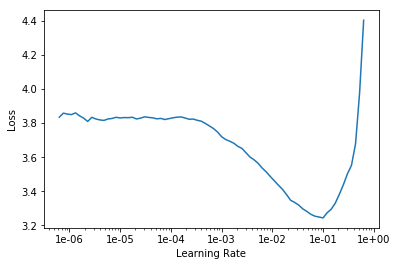

In [0]:
learna.recorder.plot()

In [0]:
lr=6e-1

In [0]:
# Trains the model for 15 epochs
learna.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,2.301176,1.624876,0.588290,00:25
1,1.670221,1.327653,0.502771,00:25
2,1.310133,1.092303,0.423439,00:25
3,1.153659,0.934340,0.354636,00:25
4,1.045341,0.819659,0.310307,00:25
5,0.951050,0.790433,0.304581,00:25
6,0.897030,0.726357,0.278814,00:25
7,0.838630,0.670571,0.249538,00:25
8,0.817877,0.674609,0.260344,00:25
9,0.782464,0.625318,0.232361,00:25


In [0]:
interpa = ClassificationInterpretation.from_learner(learna)

losses,idxs = interpa.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

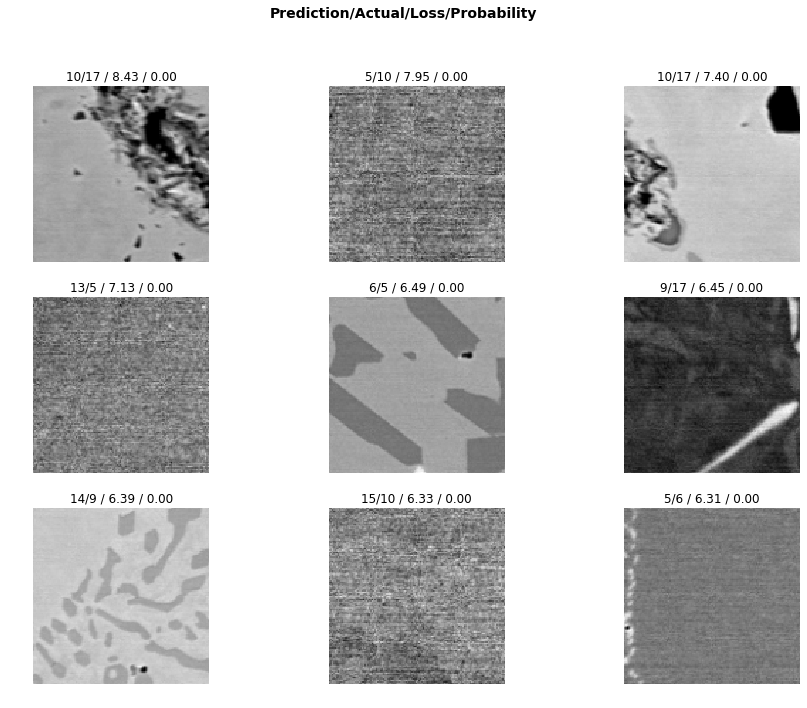

In [0]:
interpa.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interpa.plot_top_losses)

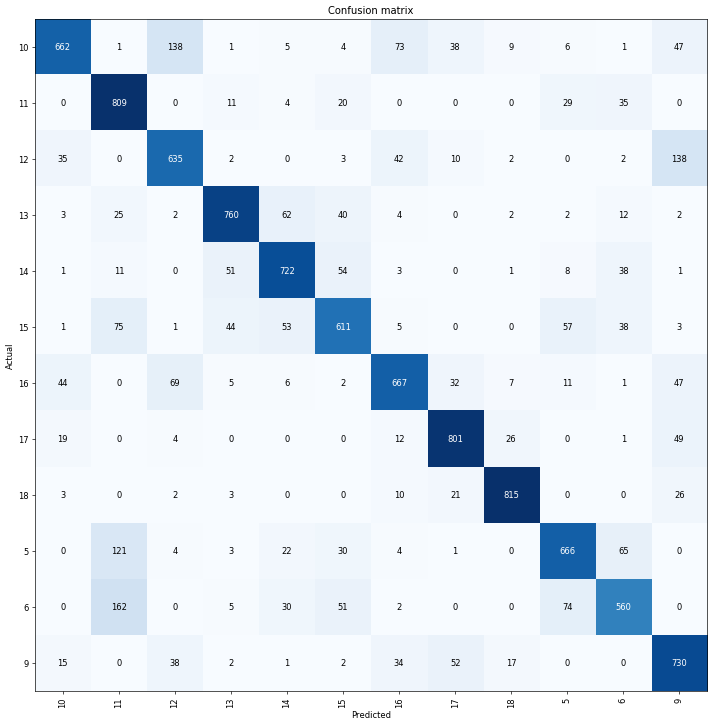

In [0]:
interpa.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interpa.most_confused(min_val=2)

[('6', '11', 162),
 ('10', '12', 138),
 ('12', '9', 138),
 ('5', '11', 121),
 ('15', '11', 75),
 ('6', '5', 74),
 ('10', '16', 73),
 ('16', '12', 69),
 ('5', '6', 65),
 ('13', '14', 62),
 ('15', '5', 57),
 ('14', '15', 54),
 ('15', '14', 53),
 ('9', '17', 52),
 ('14', '13', 51),
 ('6', '15', 51),
 ('17', '9', 49),
 ('10', '9', 47),
 ('16', '9', 47),
 ('15', '13', 44),
 ('16', '10', 44),
 ('12', '16', 42),
 ('13', '15', 40),
 ('10', '17', 38),
 ('14', '6', 38),
 ('15', '6', 38),
 ('9', '12', 38),
 ('11', '6', 35),
 ('12', '10', 35),
 ('9', '16', 34),
 ('16', '17', 32),
 ('5', '15', 30),
 ('6', '14', 30),
 ('11', '5', 29),
 ('17', '18', 26),
 ('18', '9', 26),
 ('13', '11', 25),
 ('5', '14', 22),
 ('18', '17', 21),
 ('11', '15', 20),
 ('17', '10', 19),
 ('9', '18', 17),
 ('9', '10', 15),
 ('13', '6', 12),
 ('17', '16', 12),
 ('11', '13', 11),
 ('14', '11', 11),
 ('16', '5', 11),
 ('12', '17', 10),
 ('18', '16', 10),
 ('10', '18', 9),
 ('14', '5', 8),
 ('16', '18', 7),
 ('10', '5', 6),
 ('

In [0]:
learna.save('res34-15')

### ResNet50

Now try 50 layer

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


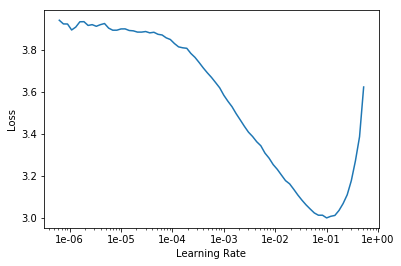

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,1.990668,1.379880,0.502032,00:49
1,1.439233,1.099791,0.408109,00:48
2,1.130759,0.944131,0.359438,00:49
3,1.000339,0.780339,0.292298,00:48
4,0.894107,0.696857,0.259051,00:49
5,0.803832,0.628177,0.227189,00:49
6,0.751488,0.585842,0.214536,00:49
7,0.700461,0.542380,0.199113,00:48
8,0.668646,0.512259,0.186461,00:49
9,0.622637,0.495361,0.176856,00:49


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('6', '11', 125),
 ('12', '9', 106),
 ('5', '11', 104),
 ('10', '12', 81),
 ('15', '11', 61),
 ('14', '15', 54),
 ('6', '5', 54),
 ('5', '6', 51),
 ('16', '12', 50),
 ('6', '15', 48),
 ('13', '14', 46),
 ('12', '10', 44),
 ('10', '16', 43),
 ('15', '13', 43),
 ('15', '14', 42),
 ('9', '17', 39),
 ('16', '10', 38),
 ('17', '9', 37),
 ('16', '9', 35),
 ('6', '14', 34),
 ('9', '12', 33),
 ('10', '9', 32),
 ('12', '16', 32),
 ('11', '6', 31),
 ('11', '5', 30),
 ('13', '15', 29),
 ('14', '13', 29),
 ('15', '6', 29),
 ('5', '15', 26),
 ('9', '16', 23),
 ('9', '10', 21),
 ('17', '18', 20),
 ('17', '10', 19),
 ('14', '6', 18),
 ('15', '5', 18),
 ('11', '15', 16),
 ('17', '16', 16),
 ('9', '18', 16),
 ('18', '17', 13),
 ('16', '17', 12),
 ('13', '11', 11),
 ('13', '6', 11),
 ('5', '14', 11),
 ('18', '16', 10),
 ('18', '9', 10),
 ('14', '11', 9),
 ('16', '5', 9),
 ('10', '17', 8),
 ('11', '13', 7),
 ('13', '10', 5),
 ('16', '18', 5),
 ('10', '15', 4),
 ('10', '5', 4),
 ('12', '17', 4),
 ('14', 

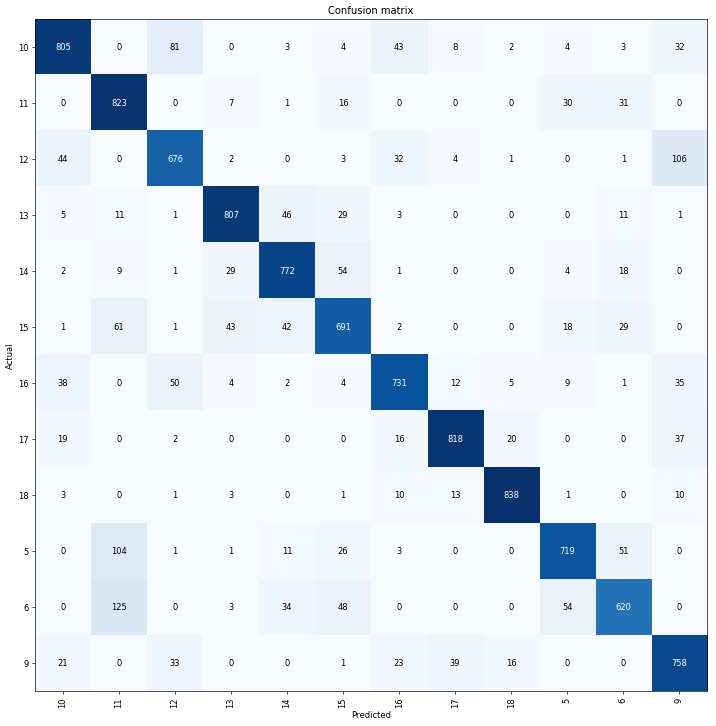

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=300)

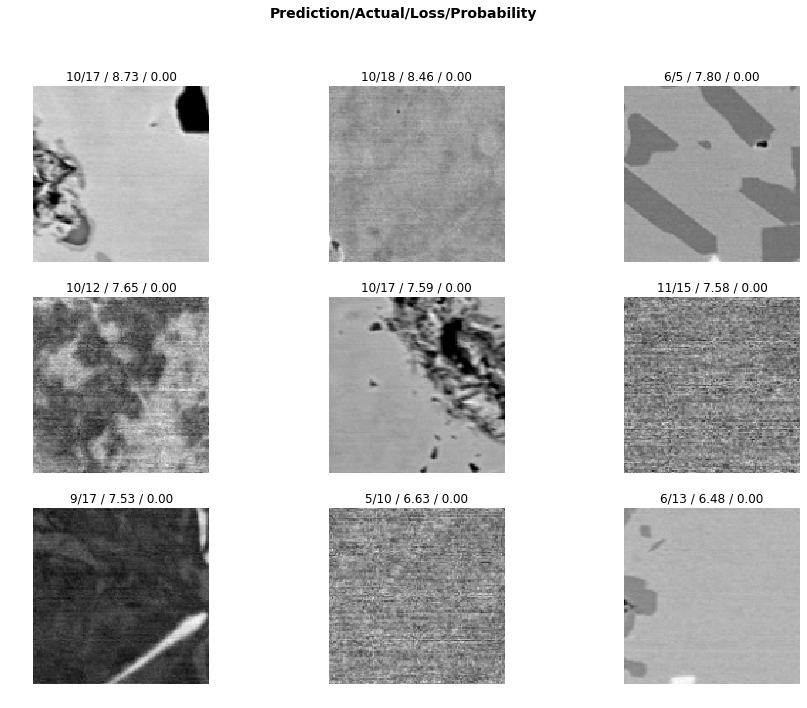

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.save('res50-15')

### ResNet101

Deeper!

In [0]:
learn101 = cnn_learner(data, models.resnet101, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/seanorzolek/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:01<00:00, 102MB/s]  


In [0]:
learn101.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


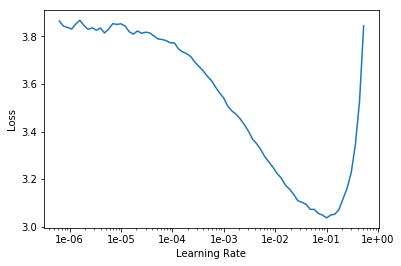

In [0]:
learn101.recorder.plot()

In [0]:
learn101.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,1.971257,1.390529,0.489472,01:18
1,1.410077,1.066358,0.406539,01:19
2,1.094735,0.897281,0.345031,01:20
3,0.970318,0.818637,0.300055,01:20
4,0.828376,0.636885,0.238918,01:20
5,0.741592,0.621954,0.225711,01:19
6,0.692809,0.592957,0.216568,01:20
7,0.659146,0.508401,0.190155,01:20
8,0.615974,0.479385,0.175286,01:20
9,0.576413,0.467723,0.169745,01:21


In [0]:
interp101 = ClassificationInterpretation.from_learner(learn101)

In [0]:
interp101.most_confused(min_val=2)

[('6', '11', 158),
 ('12', '9', 109),
 ('5', '11', 103),
 ('15', '11', 69),
 ('6', '5', 69),
 ('10', '12', 63),
 ('16', '12', 49),
 ('10', '16', 47),
 ('14', '15', 47),
 ('10', '9', 45),
 ('13', '14', 45),
 ('15', '13', 43),
 ('15', '14', 42),
 ('5', '6', 42),
 ('15', '5', 39),
 ('6', '14', 39),
 ('16', '9', 38),
 ('6', '15', 38),
 ('14', '13', 35),
 ('12', '16', 34),
 ('17', '9', 34),
 ('16', '10', 32),
 ('12', '10', 30),
 ('11', '5', 28),
 ('9', '12', 28),
 ('13', '15', 26),
 ('9', '17', 26),
 ('5', '15', 24),
 ('15', '6', 20),
 ('17', '18', 18),
 ('18', '9', 17),
 ('11', '6', 16),
 ('17', '10', 15),
 ('9', '10', 15),
 ('17', '16', 14),
 ('6', '13', 14),
 ('14', '6', 13),
 ('9', '16', 13),
 ('13', '11', 12),
 ('11', '15', 10),
 ('16', '17', 9),
 ('18', '17', 9),
 ('5', '14', 9),
 ('9', '18', 9),
 ('18', '16', 8),
 ('11', '13', 7),
 ('13', '6', 7),
 ('14', '11', 7),
 ('16', '5', 6),
 ('10', '17', 5),
 ('10', '5', 5),
 ('12', '17', 5),
 ('13', '10', 5),
 ('16', '18', 5),
 ('11', '14', 

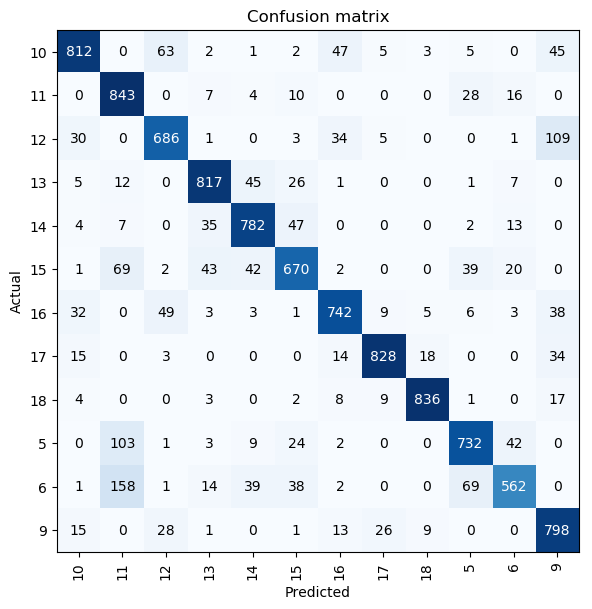

In [0]:
interp101.plot_confusion_matrix(figsize=(6,6), dpi=100)#,cmap="viridis")

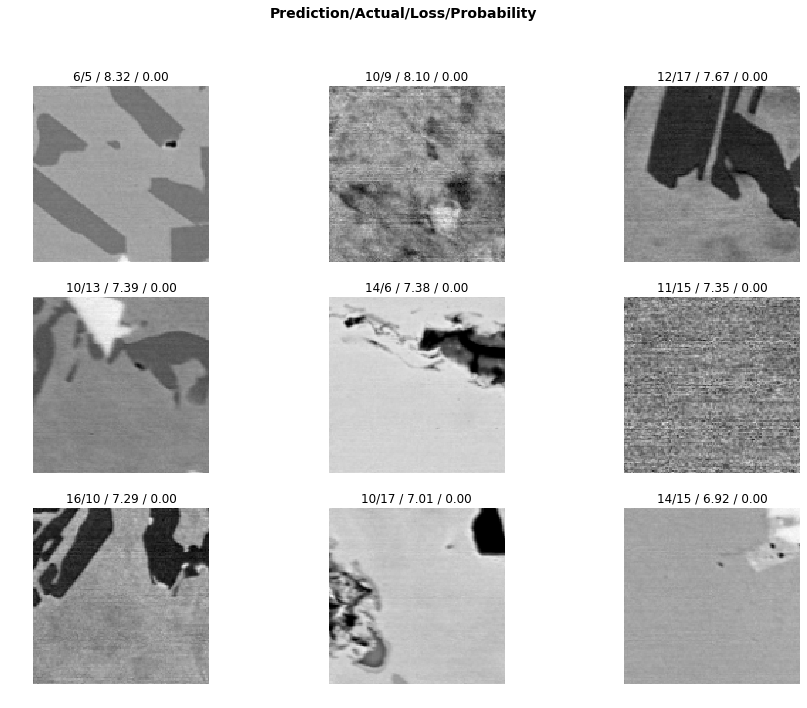

In [0]:
interp101.plot_top_losses(9, figsize=(15,11))

In [0]:
learn101.save('res101-15')